# Intro to Python - Advanced

This iPython Notebook goes through some common packages and more complicated aspects of python. 
It contains examples and problems to work on. 

In [4]:
# Best practice is to set up all your imports at the top of the script / notebook
import numpy as np                  # Numpy is a package for scientific computing (linear algebra) - http://www.numpy.org
import scipy as sp                  # Scipy is a package for math, science and engineering - http://www.scipy.org
import pandas as pd                 # Pandas is a package for data structures - http://pandas.pydata.org
import matplotlib.pyplot as plt     # Matplotlib is a package for plotting - http://matplotlib.org
import statsmodels.api as sm        # Stats models is a package for statistics - http://statsmodels.sourceforge.net
#import scikitlearn as sci

# This sets a higher resolution for figures
%config InlineBackend.figure_format = 'retina'
# Pylab: pylab is part of the plotting library matplotlib, and imports matplotlib and numpy packages. 
# The inline argument makes all your plots appear inline with the notebook
%pylab inline
# This is a useful tutorial about pylab: http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut1.html

# Note that numpy and matplotlib were redundantly imported here (as they are imported with pylab)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# A package is basically just a collection of functions, grouped together
# If you want a list of what's in a function, you should consult the documentation,
# A quick check for whats in a package can be done with the dir command
dir(np);

In [57]:
## Numpy things
# Numpy is best for linear algebra, and handling matrix type data

# Numpy gives you a new type to work with arrays / vectors / matrices. This is more practical than using lists
list_vector = list([1,2,3,4,5])
np_vector = np.array([1,2,3,4,5])
print 'List vector: ', list_vector, ' is of type ', type(list_vector)
print 'Numpy vector: ', np_vector, ' is of type ', type(np_vector), '\n'

# Numpy comes with a set of functions to manipulate these arrays
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
c = np.concatenate([a, b])
print 'Concatenated Vector: ', c


List vector:  [1, 2, 3, 4, 5]  is of type  <type 'list'>
Numpy vector:  [1 2 3 4 5]  is of type  <type 'numpy.ndarray'> 

Concatenated Vector:  [1 2 3 4 5 6 7 8]


In [59]:
# Numpy also has functions to create special matrices (just like the matlab ones)
zeros_matrix = np.zeros([2, 2])
ones_matrix = np.ones([2, 2])

print 'Zeros Matrix: \n', zeros_matrix
print 'Ones Matrix: \n', ones_matrix

type(zeros_matrix)

summed_matrix = zeros_matrix + ones_matrix
multiplied_matrix = zeros_matrix * ones_matrix
print 'Summed Matrix: \n', summed_matrix
print 'Multiplied Matrix: \n', multiplied_matrix

Zeros Matrix: 
[[ 0.  0.]
 [ 0.  0.]]
Ones Matrix: 
[[ 1.  1.]
 [ 1.  1.]]
Summed Matrix: 
[[ 1.  1.]
 [ 1.  1.]]
Multiplied Matrix: 
[[ 0.  0.]
 [ 0.  0.]]


In [60]:
# Indexing in Python
# Python is a 0-based language. That means that everything starts counting at zero. 
v = [1, 2, 3, 4]
print 'First Index: ', v[0]
print 'Second Index: ', v[1]
print 'Matrix Index: ', zeros_matrix[0, 0]

First Index:  1
Second Index:  2
Matrix Index:  0.0


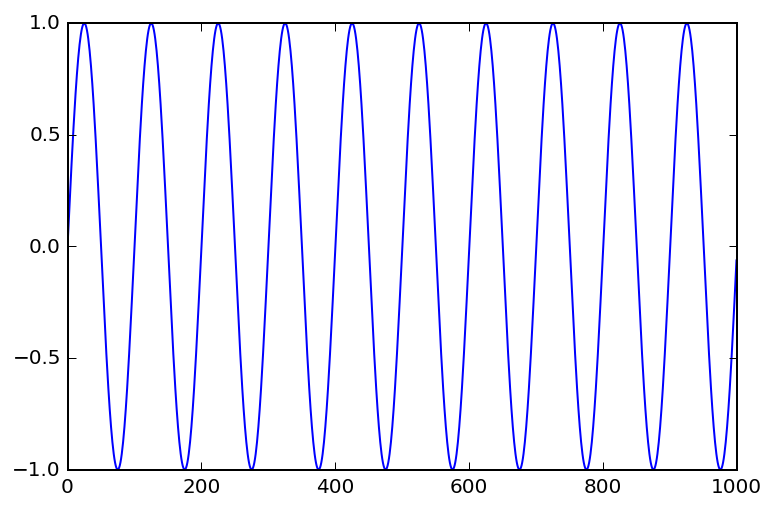

In [61]:
## Example data, plotting
# Create a simple sinusoid, and plot it
# 1 second of data samples at spacing of 1/1000 seconds
t = arange(0, 1, 1.0/1000)
# sine wave of 10 Hz
s = np.sin(2 * pi * 10 * t)
# plot first 20 points of the resulting data
figure()
plt.plot(s)

In [5]:
# Import some data from Stats Models (this lets you access example data, like in R)
# Note that it loads the data in a Pandas data frame
duncan_prestige = sm.datasets.get_rdataset("Duncan", "car")

In [7]:
# Remember to use the help function to figure out what's going on
sm.datasets.get_rdataset?

In [8]:
# Check the doc for what we just imported 
# Remember, if you want to check what attributes an object has, do dir(object)
print duncan_prestige.title          # Print the title of the data we just loada
print ' '
print duncan_prestige.__doc__

Duncan's Occupational Prestige Data
 
+----------+-------------------+
| Duncan   | R Documentation   |
+----------+-------------------+

Duncan's Occupational Prestige Data
-----------------------------------

Description
~~~~~~~~~~~

The ``Duncan`` data frame has 45 rows and 4 columns. Data on the
prestige and other characteristics of 45 U. S. occupations in 1950.

Usage
~~~~~

::

    Duncan

Format
~~~~~~

This data frame contains the following columns:

type
    Type of occupation. A factor with the following levels: ``prof``,
    professional and managerial; ``wc``, white-collar; ``bc``,
    blue-collar.

income
    Percent of males in occupation earning $3500 or more in 1950.

education
    Percent of males in occupation in 1950 who were high-school
    graduates.

prestige
    Percent of raters in NORC study rating occupation as excellent or
    good in prestige.

Source
~~~~~~

Duncan, O. D. (1961) A socioeconomic index for all occupations. In
Reiss, A. J., Jr. (Ed.) *Occupati

In [66]:
# The head function lets you print out a defined number of rows of data
print duncan_prestige.data.head(10)

            type  income  education  prestige
accountant  prof      62         86        82
pilot       prof      72         76        83
architect   prof      75         92        90
author      prof      55         90        76
chemist     prof      64         86        90
minister    prof      21         84        87
professor   prof      64         93        93
dentist     prof      80        100        90
reporter      wc      67         87        52
engineer    prof      72         86        88


In [11]:
dir(duncan_prestige);

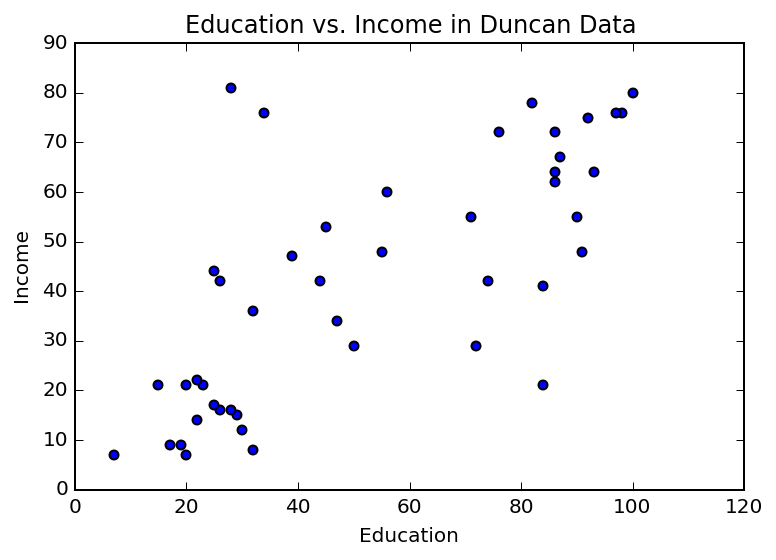

In [12]:
# Make a scatter plot of the data
plt.scatter(duncan_prestige.data.education, duncan_prestige.data.income)
plt.title('Education vs. Income in Duncan Data')
plt.xlabel('Education')
plt.ylabel('Income')

In [13]:
cor_coef, p_value = sp.stats.stats.pearsonr(duncan_prestige.data.education, duncan_prestige.data.income)
print 'The correlation coefficient is: ', cor_coef
print 'The p-vaue is: ', p_value, '\n'

if p_value < 0.05:
    print 'Woohooo! Victory! It\'s Significant! Science Accomplished!'
else:
    print 'Awww....'

The correlation coefficient is:  0.724512356479
The p-vaue is:  1.83994641852e-08 

Woohooo! Victory! It's Significant! Science Accomplished!


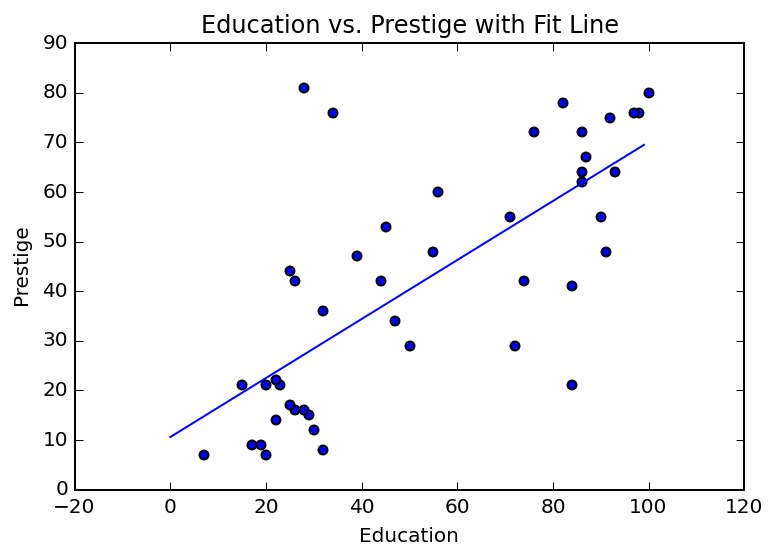

In [14]:
# Add a best fit line to the plot
# Numpy has function to fit a line to a set of data. This returns a line equation
fit_line_params = np.polyfit(duncan_prestige.data.education, duncan_prestige.data.income, 1)
# Use the line equation to get some points of the line
fit_line_points = np.polyval(fit_line_params, range(0,max(duncan_prestige.data.education)))
# Plot the scatter plot again
plt.scatter(duncan_prestige.data.education, duncan_prestige.data.income)
# hold is a function that holds the current plot so that subsequent plot call land on the same figure
hold
# Plot the best fit line points
plt.plot(fit_line_points)
# Add things to plot
plt.title('Education vs. Prestige with Fit Line')
plt.xlabel('Education')
plt.ylabel('Prestige')


In [ ]:
# Programming Challenge - Temperature converter
# Write a function that converts between Celsius and Fahrenheit
# The formulas for conversion are:
#  temp_in_celsius = (5/9) * (temp_in_fahrenheit - 32)
#  temp_in_fahrenheit = (9/5) * temp_in_celsius + 32